<a href="https://colab.research.google.com/github/arushnab/bonn-eeg-ml/blob/main/notebooks/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
import zipfile
import os
import sys

# Upload the dataset
uploaded = files.upload()

with zipfile.ZipFile("bonn-eeg-ml.zip", 'r') as zip_ref:
    zip_ref.extractall()

base_path = "bonn-eeg-ml"
for fname in os.listdir(base_path):
    if fname.endswith(".zip"):
        fpath = os.path.join(base_path, fname)
        extract_to = os.path.join(base_path, fname.replace(".zip", ""))
        with zipfile.ZipFile(fpath, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

sys.path.append(os.path.join(base_path, "scripts"))



Saving bonn-eeg-ml.zip to bonn-eeg-ml (2).zip


In [46]:
uploaded = files.upload()  # upload scripts


Saving extract_features.py to extract_features (5).py
Saving preprocess.py to preprocess (5).py
Saving trainmodel.py to trainmodel.py


In [47]:
import os
print(os.listdir("bonn-eeg-ml/z (2)/z/Z"))


['Z065.txt', 'Z085.txt', 'Z077.txt', 'Z078.txt', 'Z099.txt', 'Z053.txt', 'Z044.txt', 'Z003.txt', 'Z063.txt', 'Z067.txt', 'Z015.txt', 'Z097.txt', 'Z009.txt', 'Z025.txt', 'Z054.txt', 'Z039.txt', 'Z042.txt', 'Z035.txt', 'Z050.txt', 'Z052.txt', 'Z004.txt', 'Z091.txt', 'Z024.txt', 'Z095.txt', 'Z076.txt', 'Z019.txt', 'Z011.txt', 'Z068.txt', 'Z001.txt', 'Z100.txt', 'Z027.txt', 'Z023.txt', 'Z028.txt', 'Z084.txt', 'Z047.txt', 'Z032.txt', 'Z006.txt', 'Z017.txt', 'Z092.txt', 'Z021.txt', 'Z030.txt', 'Z058.txt', 'Z020.txt', 'Z037.txt', 'Z033.txt', 'Z081.txt', 'Z090.txt', 'Z072.txt', 'Z049.txt', 'Z041.txt', 'Z048.txt', 'Z098.txt', 'Z060.txt', 'Z029.txt', 'Z022.txt', 'Z073.txt', 'Z010.txt', 'Z080.txt', 'Z040.txt', 'Z018.txt', 'Z075.txt', 'Z071.txt', 'Z056.txt', 'Z016.txt', 'Z059.txt', 'Z086.txt', 'Z079.txt', 'Z036.txt', 'Z007.txt', 'Z014.txt', 'Z074.txt', 'Z096.txt', 'Z064.txt', 'Z093.txt', 'Z034.txt', 'Z082.txt', 'Z070.txt', 'Z008.txt', 'Z066.txt', 'Z057.txt', 'Z055.txt', 'Z069.txt', 'Z038.txt', 'Z0

In [45]:
!rm trainmodel.py



In [48]:
!cat trainmodel.py


import numpy as np
import os
from preprocess import load_eeg_folder
from extract_features import extract_bandpowers  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def main():
    z_folder = "bonn-eeg-ml/z (2)/z/Z"
    s_folder = "bonn-eeg-ml/s/S"

    z_signals = load_eeg_folder(z_folder, limit=5)
    s_signals = load_eeg_folder(s_folder, limit=5)

    X = []
    y = []

    for fname, signal in z_signals:
        X.append(list(extract_bandpowers(signal).values()))
        y.append(0)  # Z = 0

    for fname, signal in s_signals:
        X.append(list(extract_bandpowers(signal).values()))
        y.append(1)  # S = 1

    X = np.array(X)
    y = np.array(y)

    print("Loaded Z signals:", len(z_signals))
    print("Loaded S signals:", len(s_signals))
    print("Label distribution:", np.unique(y, return_counts=

In [53]:
from preprocess import load_eeg_folder
from extract_features import extract_bandpowers
import numpy as np

z_signals = load_eeg_folder("bonn-eeg-ml/z (2)/z/Z")
s_signals = load_eeg_folder("bonn-eeg-ml/s/S")

X = []
y = []

for i, signal in z_signals:
  X.append(list(extract_bandpowers(signal).values()))
  y.append(0)
for i, signal in s_signals:
    X.append(list(extract_bandpowers(signal).values()))
    y.append(1)
X = np.array(X)
y = np.array(y)
print("Class distribution:", np.unique(y, return_counts=True))

Class distribution: (array([0, 1]), array([100, 100]))


Label values: (array([0, 1]), array([100, 100]))


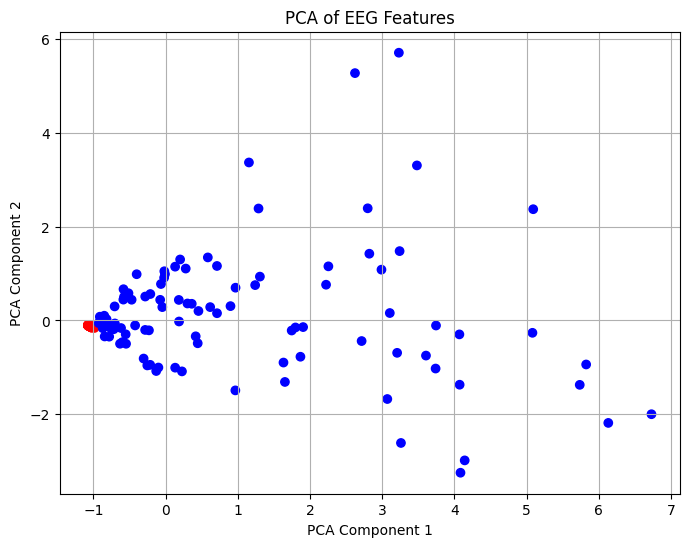

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print("Label values:", np.unique(y, return_counts=True))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Assign colors
colors = ['red' if label == 0 else 'blue' for label in y]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.title("PCA of EEG Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()



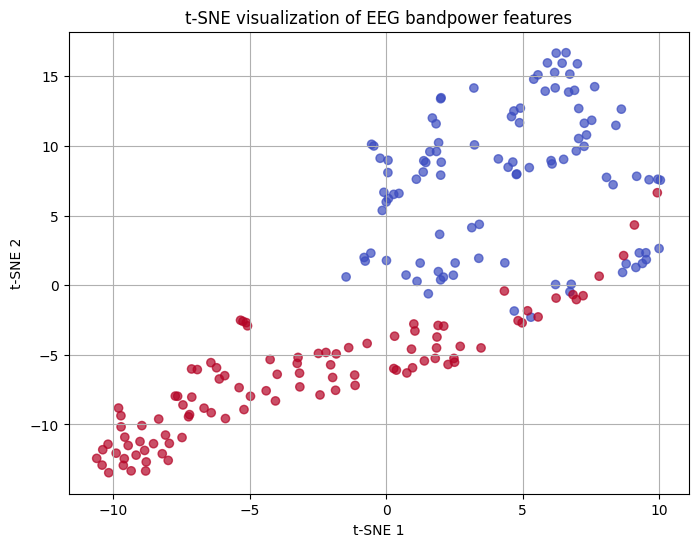

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = np.array(X)
y = np.array(y)
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE output
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("t-SNE visualization of EEG bandpower features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
#plt.colorbar(scatter, label='Class (0=Z, 1=F)')
plt.grid(True)
plt.show()


In [52]:
!python3 trainmodel.py


Loaded Z signals: 5
Loaded S signals: 5
Label distribution: (array([0, 1]), array([5, 5]))

--- Fold 1 ---
Accuracy: 0.5
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 